In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
from astropy.io import fits
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

from light_curve import GRB
plt.style.use('seaborn-whitegrid')

In [2]:
# main dataframe with all info
df = GRB.lcdf

In [18]:
# dataframe with reference and target GRB info
datadf = pd.read_csv('data/new_distance_file.csv')

In [21]:
resultdf = datadf.loc[datadf.sigma < 10, :]
resultdf.shape

(5, 10)

In [22]:
resultdf

,binsize,brightest_detector,dec,distance,index,name,ra,refGRBname,sigma,t90
3,1.0,n2,-79.82,1169.0,23,GRB220415645,298.38,GRB141205018,3.812,23.040
4,1.0,n0,-83.33,1625.0,12,GRB200607921,41.33,GRB180630467,6.455,26.625
5,1.0,na,-85.93,1312.0,7,GRB110520302,71.01,GRB170116238,4.673,12.288
8,1.0,n6,-83.38,1115.0,11,GRB220430900,9.01,GRB121216419,4.127,30.464
14,1.0,n1,-75.62,1877.0,50,GRB170121067,3.03,GRB220430900,5.811,2.304


### Donut Plot

In [23]:
pairs_value = [resultdf.shape[0], datadf.shape[0]]
label_value = ['Less than 10 sigma', 'Pairs Analyzed']

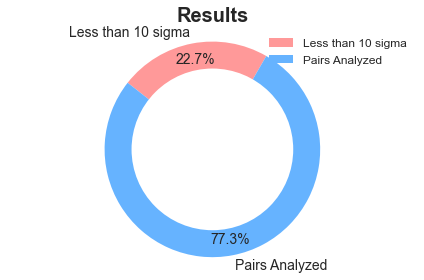

In [25]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(pairs_value, colors = colors, labels=label_value, autopct='%.1f%%', 
        pctdistance=0.85, startangle=60, textprops={'fontsize':14})
#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
ax1.set_title('Results', fontsize=20, fontweight='bold')
ax1.legend(loc='upper right', fontsize=12) 
plt.tight_layout()
plt.show()

In [26]:
def delay_time(refname, tarname):
    ref = GRB(refname)
    tar = GRB(tarname)
    return abs(ref.get_trigger_time() - tar.get_trigger_time())

In [27]:
resultdf['delay'] = resultdf.apply(lambda x : delay_time(x['refGRBname'], x['name']), axis=1)

C:\Users\hhsud\AppData\Local\Temp\ipykernel_5392\911842476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultdf['delay'] = resultdf.apply(lambda x : delay_time(x['refGRBname'], x['name']), axis=1)


In [28]:
resultdf

,binsize,brightest_detector,dec,distance,index,name,ra,refGRBname,sigma,t90,delay
3,1.0,n2,-79.82,1169.0,23,GRB220415645,298.38,GRB141205018,3.812,23.040,2688 days 15:03:29.871000
4,1.0,n0,-83.33,1625.0,12,GRB200607921,41.33,GRB180630467,6.455,26.625,708 days 10:54:37.020000
5,1.0,na,-85.93,1312.0,7,GRB110520302,71.01,GRB170116238,4.673,12.288,2067 days 22:28:49.022000
8,1.0,n6,-83.38,1115.0,11,GRB220430900,9.01,GRB121216419,4.127,30.464,3422 days 11:32:43.349000
14,1.0,n1,-75.62,1877.0,50,GRB170121067,3.03,GRB220430900,5.811,2.304,1925 days 19:59:06.158000


In [16]:
def roundl(x):
    return [round(y,3) for y in x]

In [42]:
delayss =  [x.seconds for x in resultdf.delay]
delaydays = [x.days for x in resultdf.delay]
# delayss = delaysns/np.timedelta64(1, 's')
# delaydays = delaysns / np.timedelta64(1, 'D')
# roundl(delaydays)

In [29]:
SPEED_OF_LIGHT = 3e8
GRAVITATIONAL_CONSTANT = 6.673e-11
def mass_of_lens(t):
    return t * SPEED_OF_LIGHT**3 / GRAVITATIONAL_CONSTANT

In [44]:
masses = list(map(mass_of_lens, delayss))
SOLAR_MASS = 1.989e30
masses = [np.format_float_scientific(x/SOLAR_MASS, precision=3) for x in masses]

In [46]:
latex_table = pd.DataFrame({'Reference GRB':resultdf['refGRBname'].values,
                            'Target GRB':resultdf['name'].values,
                            'Sigma':resultdf['sigma'].values,
                            'Delay (days)':delaydays,
                            'Mass of Lens':masses})

In [47]:
print(latex_table.drop(['Mass of Lens'], axis=1).to_latex(index=False))

\begin{tabular}{llrr}
\toprule
Reference GRB &   Target GRB &  Sigma &  Delay (days) \\
\midrule
 GRB141205018 & GRB220415645 &  3.812 &          2688 \\
 GRB180630467 & GRB200607921 &  6.455 &           708 \\
 GRB170116238 & GRB110520302 &  4.673 &          2067 \\
 GRB121216419 & GRB220430900 &  4.127 &          3422 \\
 GRB220430900 & GRB170121067 &  5.811 &          1925 \\
\bottomrule
\end{tabular}



C:\Users\hhsud\AppData\Local\Temp\ipykernel_5392\1340701494.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(latex_table.drop(['Mass of Lens'], axis=1).to_latex(index=False))


In [48]:
print(latex_table.drop(['Sigma'], axis=1).to_latex(index=False))

\begin{tabular}{llrl}
\toprule
Reference GRB &   Target GRB &  Delay (days) & Mass of Lens \\
\midrule
 GRB141205018 & GRB220415645 &          2688 &    1.103e+10 \\
 GRB180630467 & GRB200607921 &           708 &     7.99e+09 \\
 GRB170116238 & GRB110520302 &          2067 &    1.646e+10 \\
 GRB121216419 & GRB220430900 &          3422 &    8.455e+09 \\
 GRB220430900 & GRB170121067 &          1925 &    1.464e+10 \\
\bottomrule
\end{tabular}



C:\Users\hhsud\AppData\Local\Temp\ipykernel_5392\3852401599.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(latex_table.drop(['Sigma'], axis=1).to_latex(index=False))


In [49]:
resultdf

,binsize,brightest_detector,dec,distance,index,name,ra,refGRBname,sigma,t90,delay
3,1.0,n2,-79.82,1169.0,23,GRB220415645,298.38,GRB141205018,3.812,23.040,2688 days 15:03:29.871000
4,1.0,n0,-83.33,1625.0,12,GRB200607921,41.33,GRB180630467,6.455,26.625,708 days 10:54:37.020000
5,1.0,na,-85.93,1312.0,7,GRB110520302,71.01,GRB170116238,4.673,12.288,2067 days 22:28:49.022000
8,1.0,n6,-83.38,1115.0,11,GRB220430900,9.01,GRB121216419,4.127,30.464,3422 days 11:32:43.349000
14,1.0,n1,-75.62,1877.0,50,GRB170121067,3.03,GRB220430900,5.811,2.304,1925 days 19:59:06.158000


### Plots of light curve
Legend : <br>
Blue = Reference <br>
Green = Target

In [56]:
def make_hist(ref, tar, info):
    df_ref = ref.timedf_from_fitfile()
    df_tar = tar.timedf_from_fitfile()

    t90_start_ref = float(df[df['name'] == ref.name].t90_start.values)
    t90_start_tar = float(df[df['name'] == tar.name].t90_start.values)

    start = -10
    end = max(ref.t90, tar.t90) + 50
    
    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
    fig.suptitle(f'Distance : {info[0]}, Sigma : {info[1]}, Delay : {info[2]}', fontsize=16)
    
    ref_plt = axs[0].hist(df_ref.TTIME, bins=int((end - start)/ref.binsize), range=(start,end),
                label = ref.name, histtype='step', color='b')
    tar_plt = axs[1].hist(df_tar.TTIME, bins=int((end - start)/tar.binsize), range=(start,end),
                label = tar.name, histtype='step', color='g')
    
    axs[0].axvline(t90_start_ref, color='b', linestyle='--', alpha=0.5, label='T90 start')
    axs[0].axvline(t90_start_ref + ref.t90, color='r', linestyle='--', alpha=0.5, label='T90 stop')
    axs[1].axvline(t90_start_tar, color='b', linestyle='--', alpha=0.5)
    axs[1].axvline(t90_start_tar + tar.t90, color='r', linestyle='--', alpha=0.5)

    axs[0].set_ylim([min(ref_plt[0]) - 50, max(ref_plt[0]) + 50])
    axs[1].set_ylim([min(ref_plt[0]) - 50, max(ref_plt[0]) + 50])

    fig.supxlabel('Time')
    fig.supylabel('Counts per sec')


    ref_plt[2][0].set_xy(ref_plt[2][0].get_xy()[1:])
    tar_plt[2][0].set_xy(tar_plt[2][0].get_xy()[1:])
    ref_plt[2][0].set_xy(ref_plt[2][0].get_xy()[:-1])
    tar_plt[2][0].set_xy(tar_plt[2][0].get_xy()[:-1])
    
    plt.subplots_adjust(
        left=0.1,
        bottom=0.1, 
        right=0.9, 
        top=0.9, 
        wspace=0.4, 
        hspace=0
    )

    fig.legend(bbox_to_anchor=(0.4,0.6), borderaxespad=0, labels=[ref.name, tar.name], loc='upper right')

    # plt.savefig(f'res{make_hist.counter}.png')
    # make_hist.counter += 1

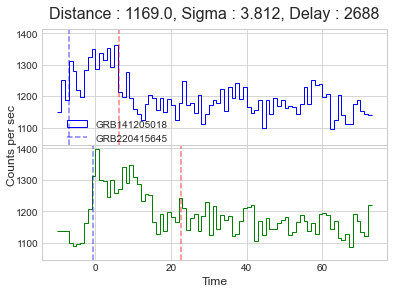

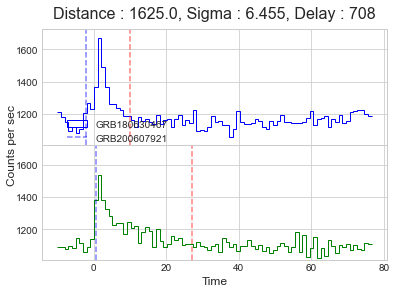

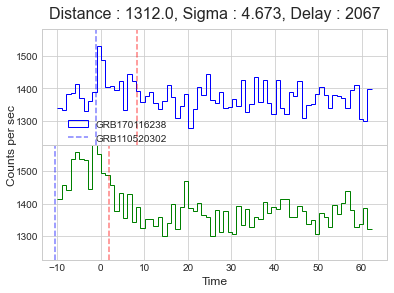

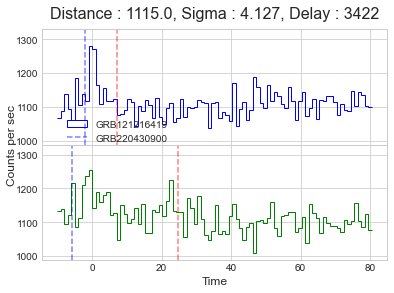

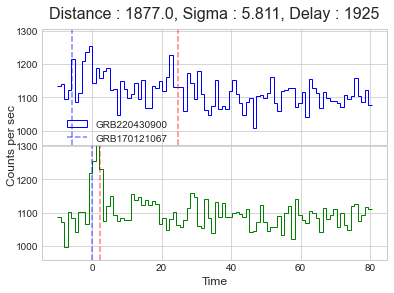

In [57]:
# make_hist.counter = 0
for i in range(resultdf.shape[0]):
    refname = resultdf.iloc[i]['refGRBname']
    tarname = resultdf.iloc[i]['name']
    tar = GRB(tarname)
    ref = GRB(refname)
    info = (resultdf.iloc[i].distance, resultdf.iloc[i].sigma, resultdf.iloc[i].delay.days)
    make_hist(ref, tar, info)

### Time delay vs $\sigma$

In [ ]:
def floatify(arr):
    return [float(x) for x in arr]

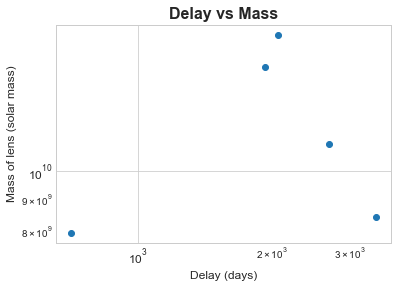

In [59]:
masses = floatify(masses)
plt.scatter(delaydays, masses)
plt.title('Delay vs Mass', fontweight='bold', fontsize=16)
plt.xlabel('Delay (days)', fontsize=12)
plt.ylabel('Mass of lens (solar mass)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', labelsize=12)

### T90 ref vs T90 target

In [60]:
t90x = [GRB(refname).t90 for refname in resultdf['refGRBname']]
t90y = [t90 for t90 in resultdf['t90']]

In [63]:
def powerlaw(x, a, b) :
    return a * np.sign(x) * np.power(np.abs(x), b)

In [66]:
popt, pcov = curve_fit(powerlaw, t90x, t90y)
fittedy = [powerlaw(x, popt[0], popt[1]) for x in t90x]

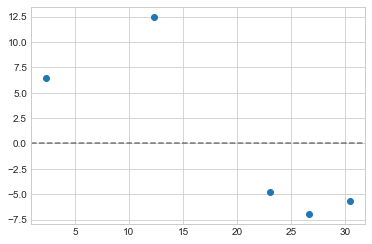

In [69]:
t90_resid = fittedy - np.array(t90y)
plt.scatter(t90y, t90_resid)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
one_sigma_band = abs(t90_resid.mean())

C:\Users\hhsud\AppData\Local\Temp\ipykernel_5392\2310623409.py:2: RuntimeWarning: divide by zero encountered in power
  return a * np.sign(x) * np.power(np.abs(x), b)
C:\Users\hhsud\AppData\Local\Temp\ipykernel_5392\2310623409.py:2: RuntimeWarning: invalid value encountered in multiply
  return a * np.sign(x) * np.power(np.abs(x), b)


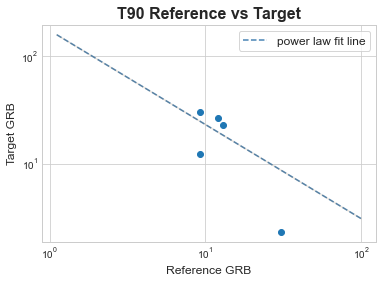

In [70]:
xlim = np.linspace(-10, 100, 100)

y1 = powerlaw(xlim, popt[0] + one_sigma_band, popt[1])
y = powerlaw(xlim, popt[0], popt[1])
y2 = powerlaw(xlim, popt[0] - one_sigma_band, popt[1])

plt.scatter(t90x, t90y)
plt.plot(xlim, y1, alpha=0.1)
plt.plot(xlim, y, '--', color='steelblue', label='power law fit line')
plt.plot(xlim, y2, alpha=0.1)
plt.fill_between(xlim, y1, y2, facecolor="gray", alpha=0.15)
plt.title('T90 Reference vs Target', fontweight='bold', fontsize=16)
# plt.errorbar(t90x, t90y, xerr=t90x_err, yerr=t90y_err, fmt='none', ecolor='r', linewidth=1, alpha=0.4,
#             label='errors')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Target GRB', fontsize=12)
plt.xlabel('Reference GRB', fontsize=12)
plt.legend(frameon=True, fontsize=12)

### Fluence ref vs Fluence target

In [ ]:
fluencex, fluencey = [], []
fx_err, fy_err = [], []
for key, value in dct.items():
    a = df.iloc[key].fluence
    for x in value:
        row = resultdf.loc[resultdf.Index == x]
        b = df.iloc[x].fluence
        fluencex.append(a)
        fluencey.append(b)
        fx_err.append(df.iloc[key].fluence_error)
        fy_err.append(df.iloc[x].fluence_error)

In [ ]:
fluencex = floatify(fluencex)
fluencey = floatify(fluencey)
fx_err = floatify(fx_err)
fy_err = floatify(fy_err)

In [ ]:
plotdf_fluence = pd.DataFrame({'x':fluencex, 'y':fluencey, 'x_err':fx_err, 'y_err':fy_err})

In [ ]:
poptf, pcovf = curve_fit(powerlaw, plotdf_fluence.x, plotdf_fluence.y)
fitted_fy = [powerlaw(x, poptf[0], poptf[1]) for x in plotdf_fluence.x]

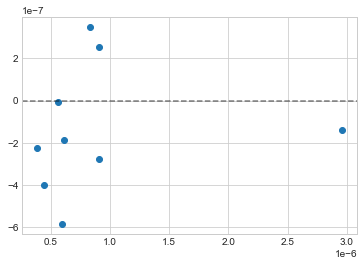

In [ ]:
fluence_resid = fitted_fy - plotdf_fluence.y
plt.scatter(plotdf_fluence.y, fluence_resid)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
one_sigma_band = abs(fluence_resid.mean())

In [ ]:
min(plotdf_fluence.x), max(plotdf_fluence.x)

(1.4875e-07, 7.832e-06)

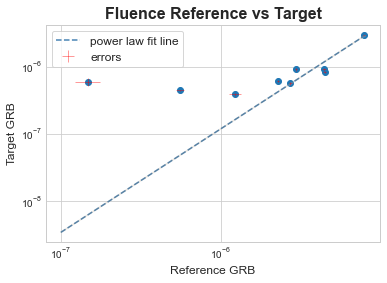

In [ ]:
xlim = np.linspace(1e-07, 8e-06, 100)

y1 = powerlaw(xlim, poptf[0] + one_sigma_band, poptf[1])
y = powerlaw(xlim, poptf[0], poptf[1])
y2 = powerlaw(xlim, poptf[0] - one_sigma_band, poptf[1])

plt.scatter(plotdf_fluence.x, plotdf_fluence.y)
plt.plot(xlim, y1, alpha=0.1)
plt.plot(xlim, y, '--', color='steelblue', label='power law fit line')
plt.plot(xlim, y2, alpha=0.1)
plt.fill_between(xlim, y1, y2, facecolor="grey", alpha=0.15)
plt.title('Fluence Reference vs Target', fontweight='bold', fontsize=16)
plt.errorbar(plotdf_fluence.x, plotdf_fluence.y, xerr=fx_err, yerr=fy_err, fmt='none', ecolor='r', linewidth=1, alpha=0.4,
            label='errors')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Target GRB', fontsize=12)
plt.xlabel('Reference GRB', fontsize=12)
plt.legend(frameon=True, fontsize=12)

### Distribution of delays

Text(0.5, 1.0, 'Delay Days Distribution, sigma < 1')

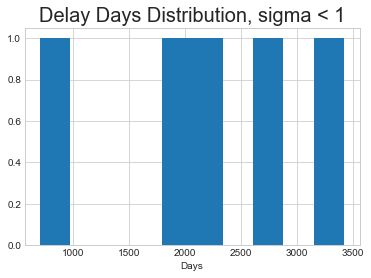

In [71]:
plt.hist(delaydays)
plt.xlabel('Days')
plt.title('Delay Days Distribution, sigma < 1', fontsize=20)